In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("train.csv")
df = pd.DataFrame(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# shape of data

In [4]:
df.shape

(891, 12)

In [5]:
# columns 

In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
# info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
## summary stats

In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
# duplicates

In [11]:
df.duplicated().sum()

0

In [12]:
## null values

In [13]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
## i will drop cabin column because it contain too many null values so dropping it here is a good choice

In [15]:
df.drop(columns=['Cabin'], axis=1, inplace=True)

In [16]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [17]:
# converting pclass into categorical type for better use in stats analysis

In [18]:
df['Pclass'] = df['Pclass'].astype('category')

In [19]:
# convert Survived into categorical as well

In [20]:
df['Survived'] = df['Survived'].astype('category')

In [21]:
# Lets fill missing age values with median but group by with pclass so it makes sense

In [22]:
df['Age'] = df['Age'].fillna(df.groupby('Pclass', observed=False)['Age'].transform('median'))

In [23]:
# Only two values are missing so mode is better option

In [24]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [25]:
# EDA

In [26]:
# Univariate Analysis

In [27]:
# Age Distribution

Text(0, 0.5, 'Count')

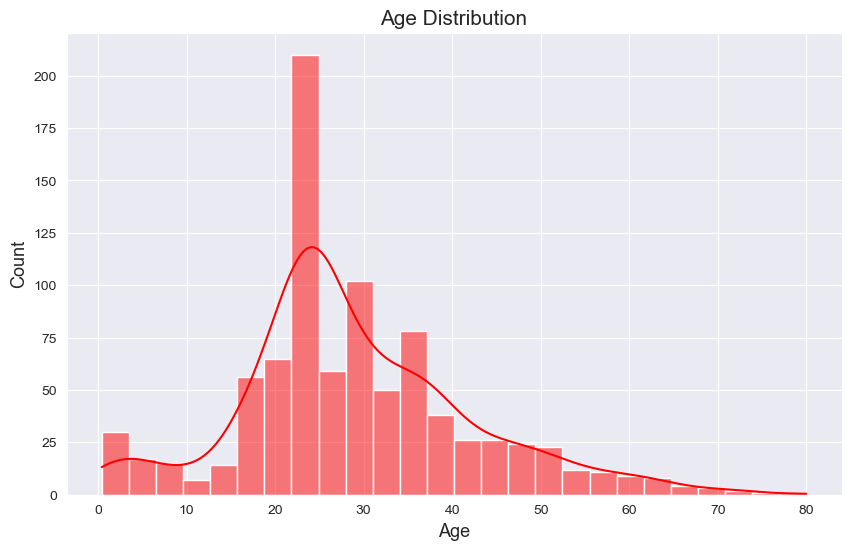

In [28]:
plt.figure(figsize=(10,6))
sns.set_style('darkgrid')
sns.histplot(df['Age'], color='r', kde=True)
plt.title('Age Distribution',fontsize = 15)
plt.xlabel('Age',fontsize = 13)
plt.ylabel('Count', fontsize = 13)

Text(0, 0.5, 'Count')

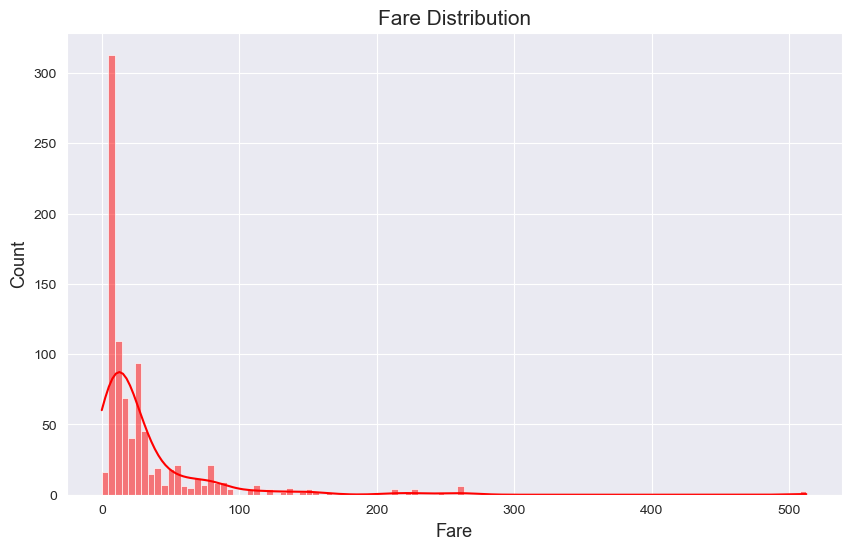

In [29]:
plt.figure(figsize=(10,6))
sns.set_style('darkgrid')
sns.histplot(df['Fare'], color='r', kde=True)
plt.title('Fare Distribution',fontsize = 15)
plt.xlabel('Fare',fontsize = 13)
plt.ylabel('Count', fontsize = 13)

In [30]:
## The data is right skewed here because it has long tail.

<Axes: ylabel='Age'>

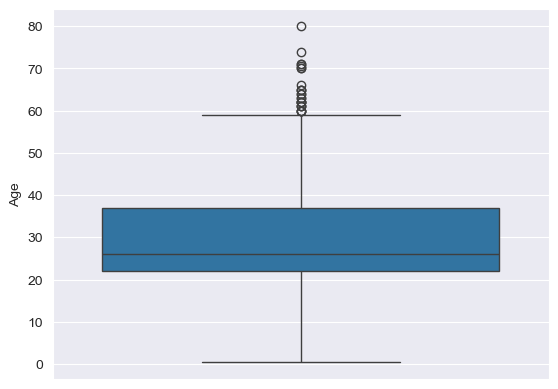

In [31]:
sns.boxplot(df['Age'])

In [32]:
## It is showing many outliers which are above then 60 but it is not necessary. These may be older individuals and we should first investigate about these
## values then decide what to do with them.

<Axes: ylabel='Fare'>

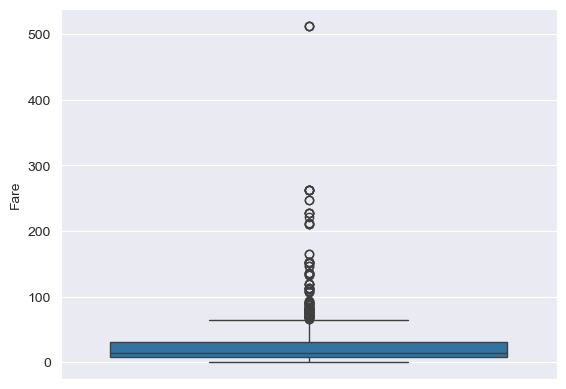

In [33]:
sns.boxplot(df['Fare'])

In [34]:
## it is showing many outliers and one of them is more then 500.But it may be the price for any vip person so we have 
## to investigae about these values and later i will come back here.

In [35]:
cols_for_univariate = ['Sex','Pclass','Embarked','Survived']
for col in cols_for_univariate:
    print(df[col].value_counts())

Sex
male      577
female    314
Name: count, dtype: int64
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Embarked
S    646
C    168
Q     77
Name: count, dtype: int64
Survived
0    549
1    342
Name: count, dtype: int64


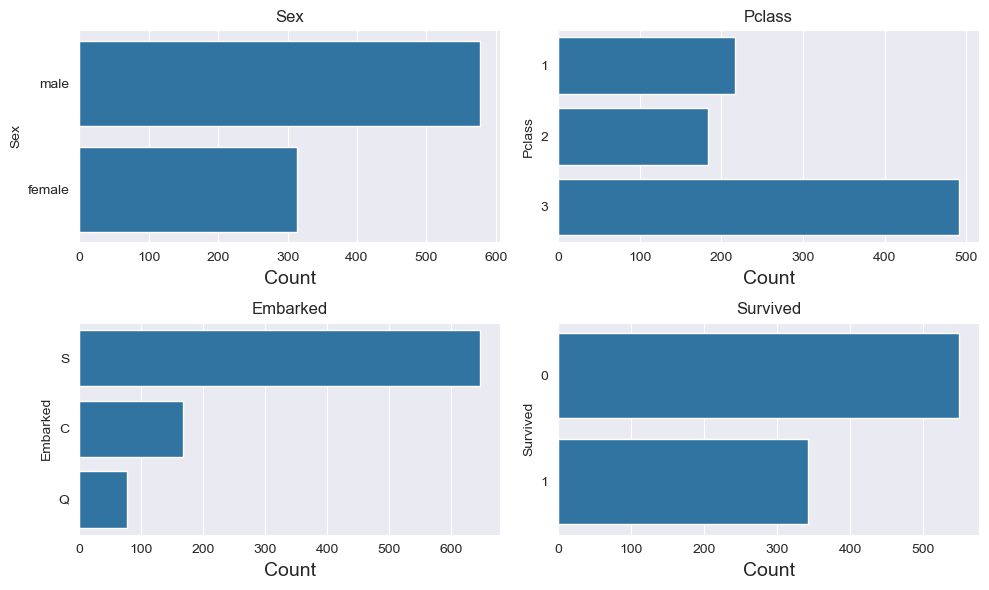

In [36]:
plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
sns.countplot(df['Sex'])
plt.title('Sex')
plt.xlabel('Count', fontsize = 14)
plt.subplot(2,2,2)
sns.countplot(df['Pclass'])
plt.title('Pclass')
plt.xlabel('Count', fontsize = 14)
plt.subplot(2,2,3)
sns.countplot(df['Embarked'])
plt.title('Embarked')
plt.xlabel('Count', fontsize = 14)
plt.subplot(2,2,4)
sns.countplot(df['Survived'])
plt.title('Survived')
plt.xlabel('Count', fontsize = 14)
plt.tight_layout()

## Bivariate Analysis

### Survival vs Gender

Text(0, 0.5, 'Survived')

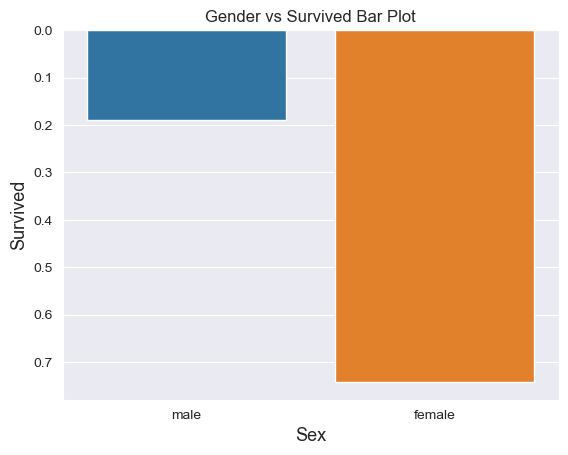

In [39]:
sns.barplot(x='Sex', y='Survived', data=df, hue = 'Sex', errorbar=('ci', 0))
plt.title('Gender vs Survived Bar Plot')
plt.xlabel('Sex',fontsize = 13)
plt.ylabel('Survived', fontsize=13)

In [40]:
## It is natural so there are high chance of survived for females.

### Survival vs Pclass

Text(0, 0.5, 'Survived')

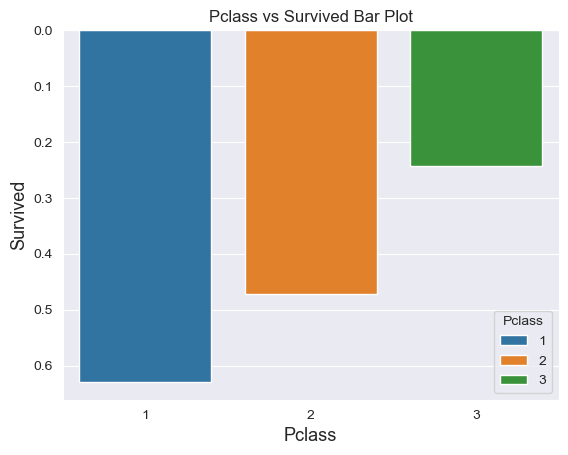

In [42]:
sns.barplot(x='Pclass', y='Survived', data=df, hue = 'Pclass', errorbar=('ci', 0))
plt.title('Pclass vs Survived Bar Plot')
plt.xlabel('Pclass',fontsize = 13)
plt.ylabel('Survived', fontsize=13)

In [43]:
#### Class 1 people has high chance of survival because more benefits provided to these peoples.

### Survival vs Age

Text(0.5, 1.0, 'Boxplot of Age & Survived')

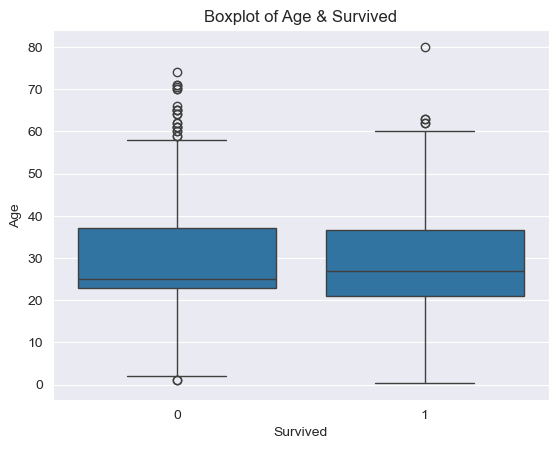

In [45]:
sns.boxplot(x = 'Survived', y = 'Age' , data=df)
plt.title('Boxplot of Age & Survived')

In [46]:
### Younder individuals have higher chance of survival but old ones have low chance of survival.

### Survival vs Fare

Text(0.5, 1.0, 'Boxplot of Fare and Survived')

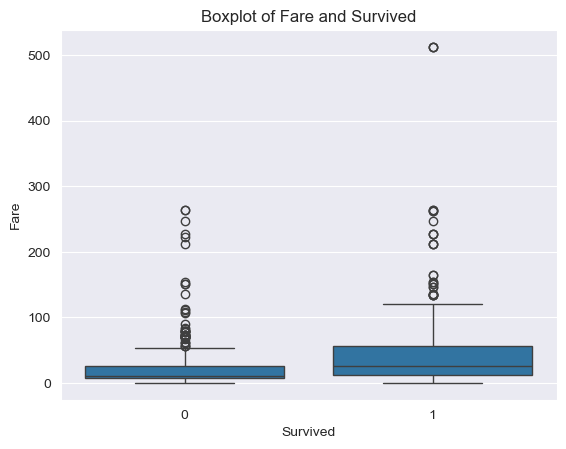

In [48]:
sns.boxplot(x = 'Survived', y = 'Fare' , data=df)
plt.title('Boxplot of Fare and Survived')

In [49]:
### Higher Fare correlate with higher survival rate. It means the passengers who pay more they have better chance of survival , may be they have better
## access to lifeboats etc.

### Survival vs Embarked 

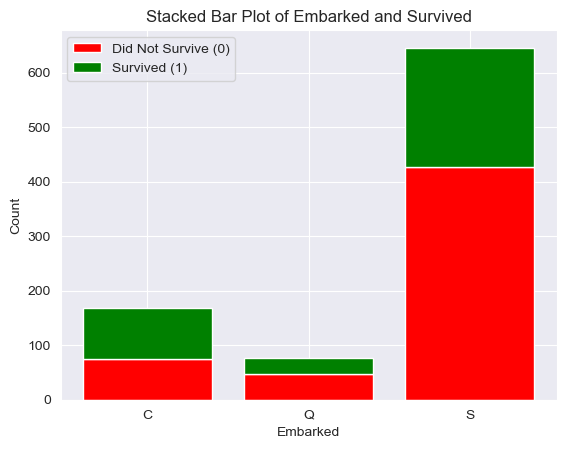

In [51]:
crosstab = pd.crosstab(df['Embarked'], df['Survived'])
plt.bar(crosstab.index, crosstab[0], label='Did Not Survive (0)', color='red')
plt.bar(crosstab.index, crosstab[1], bottom=crosstab[0], label='Survived (1)', color='green')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.title('Stacked Bar Plot of Embarked and Survived')
plt.legend()
plt.xticks(crosstab.index)
plt.show()

In [52]:
## Mostly passengers survived in S class but also died in S class

### Correlation Between Numerical Features

In [54]:
fare_age_data = df[['Fare', 'Age']].copy()

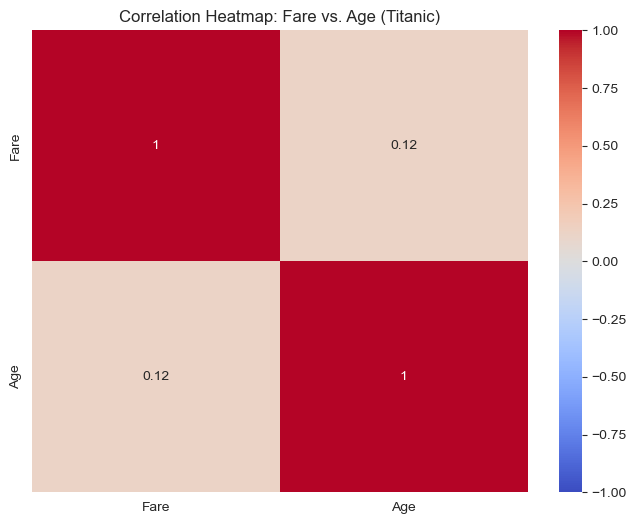

In [55]:
corr = fare_age_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap: Fare vs. Age (Titanic)')
plt.show()

In [56]:
### there is very weak correlation between fare and age

### Multivariate Analysis & Statistical Tests

In [58]:
crosstab_sex_pclass = pd.crosstab([df['Sex'], df['Pclass']], df['Survived'])
print("Survival Rate by Sex & Pclass\n\n", crosstab_sex_pclass)

Survival Rate by Sex & Pclass

 Survived         0   1
Sex    Pclass         
female 1         3  91
       2         6  70
       3        72  72
male   1        77  45
       2        91  17
       3       300  47


Female passengers in higher classes (1st & 2nd) had very high survival rates—over 90% for 1st class.
Female 3rd class had a 50% survival rate, which is still higher than any male group.

Male passengers had significantly lower survival chances in all classes—especially in 3rd class, where only 13% survived.  
**Interpretation**: Being female and in a higher class significantly improved the chances of survival—likely due to evacuation priority protocols ("women and children first").

In [60]:
crosstab_embarked_sex = pd.crosstab([df['Embarked'], df['Sex']], df['Survived'])
print("Survival Rate by Embarked & Sex\n\n", crosstab_embarked_sex)

Survival Rate by Embarked & Sex

 Survived           0    1
Embarked Sex             
C        female    9   64
         male     66   29
Q        female    9   27
         male     38    3
S        female   63  142
         male    364   77


Females had high survival rates from all ports, especially from port C (Cherbourg).
Males from port Q (Queenstown) had the lowest survival — only 3 out of 41.

The majority of deaths were males from port S.

In [62]:
crosstab_pclass_embarked = pd.crosstab([df['Pclass'], df['Embarked']], df['Survived'])
print("Survival Rate by Pclass & Embarked\n\n", crosstab_pclass_embarked)

Survival Rate by Pclass & Embarked

 Survived           0   1
Pclass Embarked         
1      C          26  59
       Q           1   1
       S          53  76
2      C           8   9
       Q           1   2
       S          88  76
3      C          41  25
       Q          45  27
       S         286  67


1st class from port C had highest survival rates, with more than double survivors compared to non-survivors.

3rd class from port S and Q had very poor survival rate port S, with 286 deaths out of 353 passengers.
Class and embarkation together affect survival, likely due to physical location on the ship and access to lifeboats.

## Chi-Square Test (For Categorical Features)

In [65]:
from scipy.stats import chi2_contingency

In [66]:
def chi_squared_test(column, target):
    """Performing Chi-Squared test."""

    contingency_table = pd.crosstab(df[column], df[target])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    print(f"Chi-Squared Test: {target} vs. {column}")
    print(f"Chi-Squared Value: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of Freedom: {dof}")

    if p < 0.05:
        print(f"Result: {column} and {target} are likely dependent.")
    else:
        print(f"Result: {column} and {target} are likely independent.")
chi_squared_test('Sex', 'Survived')
chi_squared_test('Pclass', 'Survived')
chi_squared_test('Embarked', 'Survived')

Chi-Squared Test: Survived vs. Sex
Chi-Squared Value: 260.71702016732104
P-value: 1.1973570627755645e-58
Degrees of Freedom: 1
Result: Sex and Survived are likely dependent.
Chi-Squared Test: Survived vs. Pclass
Chi-Squared Value: 102.88898875696056
P-value: 4.549251711298793e-23
Degrees of Freedom: 2
Result: Pclass and Survived are likely dependent.
Chi-Squared Test: Survived vs. Embarked
Chi-Squared Value: 25.964452881874784
P-value: 2.3008626481449577e-06
Degrees of Freedom: 2
Result: Embarked and Survived are likely dependent.


I conducted the Chi-Squared test to statistically determine whether there's a significant relationship  
between the categorical feature and the survival status of passengers.  
**Survived vs. Sex**:  
Since the p-value is far less than 0.05, i reject the null hypothesis.  
There is a strong statistical association between a passenger's sex and survival.  
**Survived vs. Pclass**:  
Again, the very small p-value indicates a statistically significant relationship between passenger class and survival.  
This confirms our visual and group analysis: higher-class passengers had better survival chances.  
**Survived vs. Embarked**:  
The result shows a significant dependence between port of embarkation and survival.  

## ANOVA Test (For Numerical vs Categorical)

In [69]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [70]:
model_fare_pclass = ols('Fare ~ C(Pclass)', data=df).fit()
anova_fare_pclass = sm.stats.anova_lm(model_fare_pclass, typ=2)
print("Fare by Pclass")
print(anova_fare_pclass)
model_age_survived = ols('Age ~ C(Survived)', data=df).fit()
anova_age_survived = sm.stats.anova_lm(model_age_survived, typ=2)
tukey_fare = pairwise_tukeyhsd(df['Fare'], df['Pclass'], alpha=0.05)
print("Age by Survived")
print(anova_age_survived)
print(tukey_fare.summary())

Fare by Pclass
                 sum_sq     df           F        PR(>F)
C(Pclass)  7.760301e+05    2.0  242.344157  1.031376e-84
Residual   1.421769e+06  888.0         NaN           NaN
Age by Survived
                    sum_sq     df         F    PR(>F)
C(Survived)     348.619386    1.0  1.989578  0.158735
Residual     155773.065721  889.0       NaN       NaN
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper   reject
-----------------------------------------------------
     1      2 -63.4925   0.0 -72.9165 -54.0685   True
     1      3 -70.4791   0.0 -78.1489 -62.8094   True
     2      3  -6.9866 0.108 -15.1064   1.1331  False
-----------------------------------------------------


**Fare by Pclass**:  
The extremely small p-value indicates a very strong statistical difference in mean fare across different passenger classes.  
This supports our prior observations — higher-class passengers paid significantly more than those in lower classes.  
**Age by Survived**:  
The p-value is greater than 0.05, so we fail to reject the null hypothesis.  
This suggests that there is no statistically significant difference in average age between those who survived and those who didn't.  
Although we earlier observed some visual age patterns (younger people surviving more), this result shows that age alone may not be a strong predictor without considering interactions with others (like sex or class).  
**Tukey HSD Results**:  
Post-hoc analysis revealed that the average fare paid by passengers in Pclass 1 is significantly higher than those in Pclass 2 and 3, confirming class as a major factor influencing fare. However, there was no significant fare difference between Pclass 2 and 3.

In [72]:
numerical_data = df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].copy()

In [73]:
numerical_data['Survived'] = numerical_data['Survived'].astype(int)

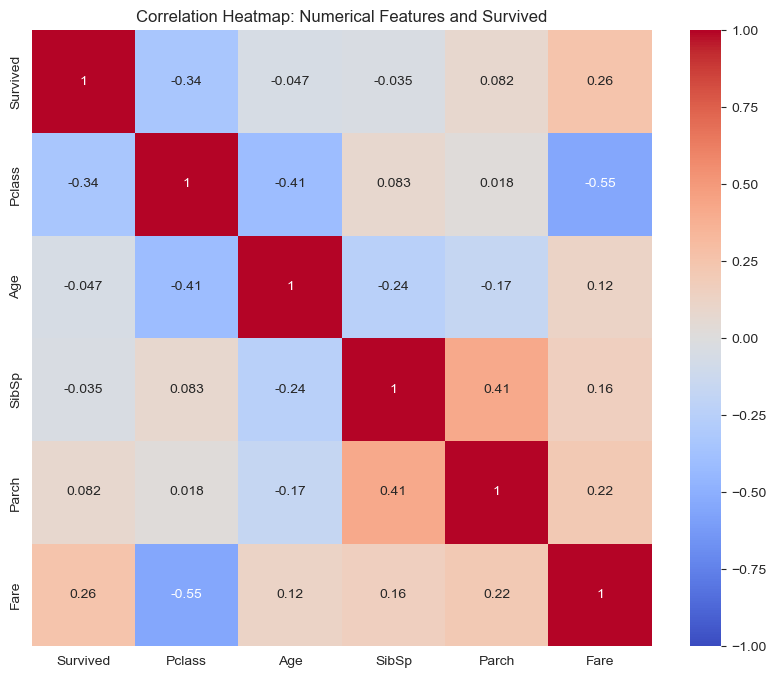

In [74]:
correlation_matrix = numerical_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap: Numerical Features and Survived')
plt.show()

In [75]:
from scipy.stats import zscore
z = np.abs(zscore(df['Fare']))
outliers = np.where(z>3)
outliers

(array([ 27,  88, 118, 258, 299, 311, 341, 377, 380, 438, 527, 557, 679,
        689, 700, 716, 730, 737, 742, 779], dtype=int64),)

In [76]:
from sklearn.preprocessing import StandardScaler
cols = ['Age', 'Fare']

# Handle missing values (imputation example: using median)
df['Age'].fillna(df['Age'].median())
df['Fare'].fillna(df['Fare'].median())

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[cols])

# Convert the scaled data back to a DataFrame with the original index
df[cols] = pd.DataFrame(scaled_data, columns=cols, index=df.index)

print(df[cols].head())

        Age      Fare
0 -0.533834 -0.502445
1  0.674891  0.786845
2 -0.231653 -0.488854
3  0.448255  0.420730
4  0.448255 -0.486337


In [77]:
df['Sex'] = df['Sex'].map({'male':0,'female':1})

In [78]:
encoded = pd.get_dummies(df['Embarked'], drop_first=True)

In [79]:
df = pd.concat([df, encoded], axis = 1)
df[['Q','S']] = df[['Q','S']].astype(int)

In [80]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",0,-0.533834,1,0,A/5 21171,-0.502445,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0.674891,1,0,PC 17599,0.786845,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,-0.231653,0,0,STON/O2. 3101282,-0.488854,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0.448255,1,0,113803,0.420730,S,0,1
4,5,0,3,"Allen, Mr. William Henry",0,0.448255,0,0,373450,-0.486337,S,0,1


In [81]:
df['family_size'] = df['Parch'] + df['SibSp'] + 1

In [82]:
df['is_alone'] = df['family_size'].apply(lambda x: 1 if x == 1 else 0)

In [83]:
X = df.drop(columns=['PassengerId','Survived','Name','Ticket','SibSp','Parch','Embarked'], axis=1)
y = df['Survived'].astype(int)

In [84]:
X.columns

Index(['Pclass', 'Sex', 'Age', 'Fare', 'Q', 'S', 'family_size', 'is_alone'], dtype='object')

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    int64   
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    object  
 11  Q            891 non-null    int32   
 12  S            891 non-null    int32   
 13  family_size  891 non-null    int64   
 14  is_alone     891 non-null    int64   
dtypes: category(2), float64(2), int32(2), int64(6), object(3)
memory usage: 85.7+ KB


In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state = 42)
model_rfc = rfc.fit(X_train, y_train)
y_pred = model_rfc.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(f'\nAccuracy is:', accuracy_score(y_test, y_pred))
print(f'\ncls is:', classification_report(y_test, y_pred))
print(f'\ncm is:', confusion_matrix(y_test, y_pred))


Accuracy is: 0.8379888268156425

cls is:               precision    recall  f1-score   support

           0       0.86      0.87      0.86       105
           1       0.81      0.80      0.80        74

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179


cm is: [[91 14]
 [15 59]]


In [88]:
## Visualize Feature Importance

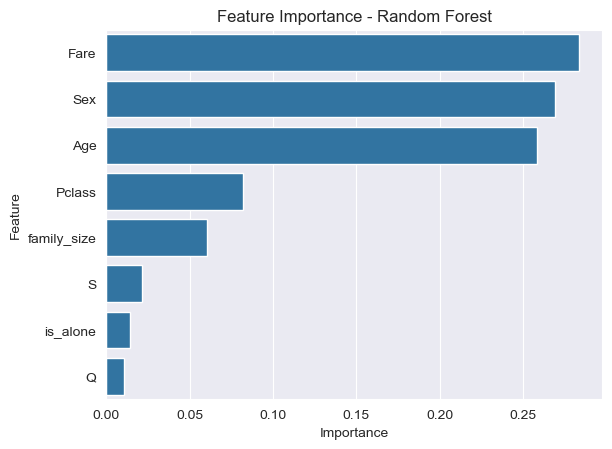

In [170]:
importances = model_rfc.feature_importances_

features = X_train.columns

feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

# Sorting
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title("Feature Importance - Random Forest")
plt.show()

Fare and Age are the most important factors, with higher fares and younger ages strongly correlating with higher survival rates.  
Sex (female) is also highly significant, reflecting prioritization of women in the lifeboats.  
Pclass (passenger class) plays a role, with first-class passengers having a higher chance of survival.  
Family Size indicates a slight impact, suggesting that passengers traveling alone may have had a lower survival rate.  
Embarked locations have a minimal influence on survival chances.  
Is Alone (whether a passenger was traveling solo) has the least impact on survival prediction.

In [90]:
import statsmodels.api as sm
X = sm.add_constant(df[['Pclass', 'Sex', 'Age', 'Fare']])
y = df['Survived']
logit_model = sm.Logit(y, X).fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.450399
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      886
Method:                           MLE   Df Model:                            4
Date:                Mon, 07 Apr 2025   Pseudo R-squ.:                  0.3236
Time:                        06:53:27   Log-Likelihood:                -401.31
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 7.790e-82
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2710      0.315      4.031      0.000       0.653       1.889
Pclass        -1.2297      0.

I used statsmodels for inferential statistics to assess feature significance, and  
scikit-learn's LogisticRegression for model evaluation and performance measurement.